IMPORTS

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.callbacks import ProgbarLogger

DATA IMPORT

In [1]:
! git clone "https://github.com/AswathKarthik10/Lung-Disease-Detection/"

^C


TRAINING AND TESTING MODEL

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

# Define input image dimensions
input_shape = (1068, 763, 3)  # Assuming input images are 1068x763 pixels

# Load pre-trained ResNet50 model without top (fully connected) layers
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = input_shape)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation = 'sigmoid')(x)  # Use sigmoid activation for binary classification
model = Model(inputs = base_model.input, outputs = predictions)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Data generators for train and test sets
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    'Lung-Disease-Detection/chest_xray/train',
    target_size=input_shape[:2],
    batch_size=5,
    class_mode='binary')  

test_generator = test_datagen.flow_from_directory(
    'Lung-Disease-Detection/chest_xray/test',
    target_size=input_shape[:2],
    batch_size=5,
    class_mode='binary')  

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 10,
    validation_data = test_generator,
    validation_steps = test_generator.samples // test_generator.batch_size,
    callbacks=[ProgbarLogger()])

model.save('Pneumonia_Predicter.h5')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
1046/1046 [==============================] - 370s 353ms/sample - loss: 0.1375 - accuracy: 0.9462 - val_loss: 0.3404 - val_accuracy: 0.8565
Epoch 2/10
1046/1046 [==============================] - 334s 320ms/sample - loss: 0.0758 - accuracy: 0.9732 - val_loss: 0.5156 - val_accuracy: 0.8274
Epoch 3/10
1046/1046 [==============================] - 334s 320ms/sample - loss: 0.0573 - accuracy: 0.9793 - val_loss: 0.5141 - val_accuracy: 0.8387
Epoch 4/10
1046/1046 [==============================] - 334s 320ms/sample - loss: 0.0478 - accuracy: 0.9824 - val_loss: 0.4886 - val_accuracy: 0.8548
Epoch 5/10
1046/1046 [==============================] - 335s 320ms/sample - loss: 0.0470 - accuracy: 0.9832 - val_loss: 0.8044 - val_accuracy: 0.7839
Epoch 6/10
1046/1046 [==============================] - 335s 320ms/sample - loss: 0.0384 - accuracy: 0.9870 - val_loss: 0.4996 - val_accuracy: 0.8629
Epoch 7/10
1046/1

C:\Users\aswat\miniconda3\envs\ext_gpu_env\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


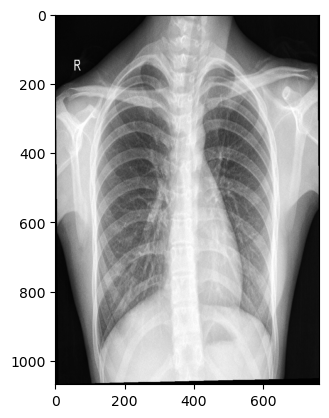

[[0.01631103]]
The given scan does not contain pneumonia


In [8]:
model = load_model('Pneumonia_Predicter.h5')


#img_path = 'Lung-Disease-Detection/Pneumonia-Test/Pneumonia/00019157_008.png'
img_path = 'NORMAL-2514572-0001.jpeg'

img = image.load_img(img_path, target_size=(1068, 763)) 
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

plt.imshow(img)
plt.axis('on')
plt.show()

img_array = preprocess_input(img_array)

prediction = model.predict(img_array)

print(prediction)

if prediction[0][0] >= 0.5:
    print('The given scan contains pneumonia')
else:
    print('The given scan does not contain pneumonia')

In [25]:
model = load_model('Pneumonia_Predicter.h5')

test_data_dir = 'Lung-Disease-Detection/Pneumonia-Test/Pneumonia'

total_images = 0
correct_predictions = 0

for filename in os.listdir(test_data_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        img_path = os.path.join(test_data_dir, filename)
        img = image.load_img(img_path, target_size=(1068, 763))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        img_array = preprocess_input(img_array)  # Apply the same preprocessing function used during training

        prediction = model.predict(img_array)

        # Interpret the prediction
        if prediction[0][0] >= 0.5:
            correct_predictions += 1
        else:
            pass
        total_images += 1

accuracy = correct_predictions / total_images

print("Accuracy:", accuracy)

Accuracy: 0.7328767123287672


In [14]:
model = load_model('Pneumonia_Predicter.h5')

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Data generators for train and test sets
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

input_shape = (1024, 1024, 3)

train_generator = train_datagen.flow_from_directory(
    'Lung-Disease-Detection/Pneumonia-Train',
    target_size=input_shape[:2],
    batch_size=5,
    class_mode = 'binary')  

test_generator = test_datagen.flow_from_directory(
    'Lung-Disease-Detection/Pneumonia-Test',
    target_size=input_shape[:2],
    batch_size=5,
    class_mode = 'binary')  

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 3,
    validation_data = test_generator,
    validation_steps = test_generator.samples // test_generator.batch_size,
    callbacks=[ProgbarLogger()])

model.save('Pneumonia_Predicter1.h5')

Found 1141 images belonging to 2 classes.
Found 292 images belonging to 2 classes.
Epoch 1/3
228/228 [==============================] - 104s 457ms/sample - loss: 0.0440 - accuracy: 0.9833 - val_loss: 3.3891e-05 - val_accuracy: 1.0000
Epoch 2/3
228/228 [==============================] - 100s 439ms/sample - loss: 5.0490e-05 - accuracy: 1.0000 - val_loss: 2.2428e-06 - val_accuracy: 1.0000
Epoch 3/3
228/228 [==============================] - 100s 438ms/sample - loss: 9.9656e-06 - accuracy: 1.0000 - val_loss: 6.5930e-07 - val_accuracy: 1.0000


C:\Users\aswat\miniconda3\envs\ext_gpu_env\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [3]:
model = load_model('Pneumonia_Predicter1.h5')

test_data_dir = 'Lung-Disease-Detection/Pneumonia-Test/Pneumonia'

total_images = 0
correct_predictions = 0

for filename in os.listdir(test_data_dir):
    if filename.endswith(".png") or filename.endswith(".jpeg"):
        img_path = os.path.join(test_data_dir, filename)
        img = image.load_img(img_path, target_size=(1068, 763))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        img_array = preprocess_input(img_array)  # Apply the same preprocessing function used during training

        prediction = model.predict(img_array)

        # Interpret the prediction
        if prediction[0][0] >= 0.5:
            correct_predictions += 1
        else:
            pass
        total_images += 1

accuracy = correct_predictions / total_images

print("Accuracy:", accuracy)

Accuracy: 1.0


In [20]:
model1 = load_model('Pneumonia_Predicter.h5')
model2 = load_model('Pneumonia_Predicter1.h5')

img_path = 